# HSMA Introduction to Prophet
## Code along lecture 1: preprocessing data into Prophet format

**In this code along lecture you will learn:**
* How to convert time series data into a `pandas.DataFrame` in Prophet format.
---

# Standard imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Step 1**: Loading a standard time series

In [49]:
y_train = pd.read_csv('../data/resp_admits_day.csv', parse_dates=True, 
                            dayfirst=True, index_col='date')
y_train.index.freq = 'D'

In [50]:
y_train.head()

,resp_admits
date,
2015-08-01,13
2015-08-02,14
2015-08-03,51
2015-08-04,35
2015-08-05,45


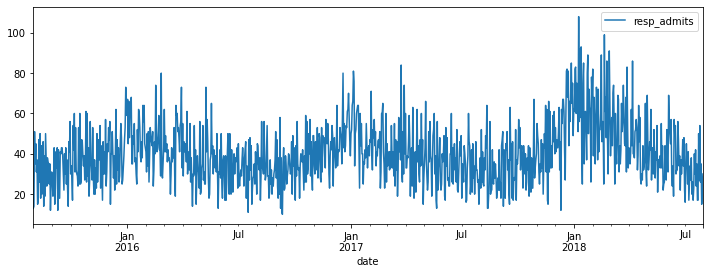

In [51]:
y_train.plot(figsize=(12,4))

# **Step 2**: Wrangle data into Prophet format

A `Prophet` model requires the data in a `pd.DataFrame` with two columns: 
* `ds` - the datetimestamp and 
* `y` the observations used in training (the index is an arbitrary numeric value).  But your current (and standard form) dataframe has a datetimeindex 

In [60]:
#create a new dataframe that just contains the dates

prophet_train = pd.DataFrame(y_train.index)
prophet_train.head()


,date
0,2015-08-01
1,2015-08-02
2,2015-08-03
3,2015-08-04
4,2015-08-05


In [61]:
#create the y data 
prophet_train['y'] = y_train.to_numpy()
prophet_train.head()

,date,y
0,2015-08-01,13
1,2015-08-02,14
2,2015-08-03,51
3,2015-08-04,35
4,2015-08-05,45


In [62]:
prophet_train.columns = ['ds', 'y']
prophet_train.head()

,ds,y
0,2015-08-01,13
1,2015-08-02,14
2,2015-08-03,51
3,2015-08-04,35
4,2015-08-05,45


# Its a good idea to organise this as a reusable function

In [52]:
def prophet_training_data(y_train):
    '''
    Converts a standard pandas datetimeindexed dataframe
    for time series into one suitable for Prophet
    Parameters:
    ---------
    y_train: pd.DataFrame
        univariate time series data
        
    Returns:
    --------
        pd.DataFrame in Prophet format 
        columns = ['ds', 'y']
    '''
    prophet_train = pd.DataFrame(y_train.index)
    prophet_train['y'] = y_train.to_numpy()
    prophet_train.columns = ['ds', 'y']

    return prophet_train

In [64]:
yp_train = prophet_training_data(y_train)
yp_train.head()

,ds,y
0,2015-08-01,13
1,2015-08-02,14
2,2015-08-03,51
3,2015-08-04,35
4,2015-08-05,45


# Its useful because we can **resuse** it!

In [66]:
y_train2 = pd.read_csv('../data/ed_reattends_day.csv', parse_dates=True, 
                            dayfirst=True, index_col='date')
y_train2.index.freq = 'D'

yp_train2 = prophet_training_data(y_train2)
yp_train2.head()

,ds,y
0,2014-04-03,110.0
1,2014-04-04,138.0
2,2014-04-05,191.0
3,2014-04-06,176.0
4,2014-04-07,203.0
